In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import datetime as dt

In [2]:
test = pd.read_csv("Data/test.csv")
stores = pd.read_csv("Data/stores.csv")
train = pd.read_csv("Data/train.csv")
transactions = pd.read_csv("Data/transactions.csv")

In [3]:
df = train.merge(stores, on = "store_nbr")
df['month_cat'] = pd.to_datetime(df['date']).dt.month_name()
df['day_cat'] = pd.to_datetime(df['date']).dt.day_name()
df['new_years_day'] = np.where((pd.to_datetime(df['date']).dt.month == 1) & ((pd.to_datetime(df['date'])).dt.day == 1), True, False)
display(df.head())
print(df.shape)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,month_cat,day_cat,new_years_day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True


(3000888, 13)


### Missing Values

#### Produce

Shape before removing missing values:  (3000888, 13)
Shape after removing missing values:  (2964924, 13)


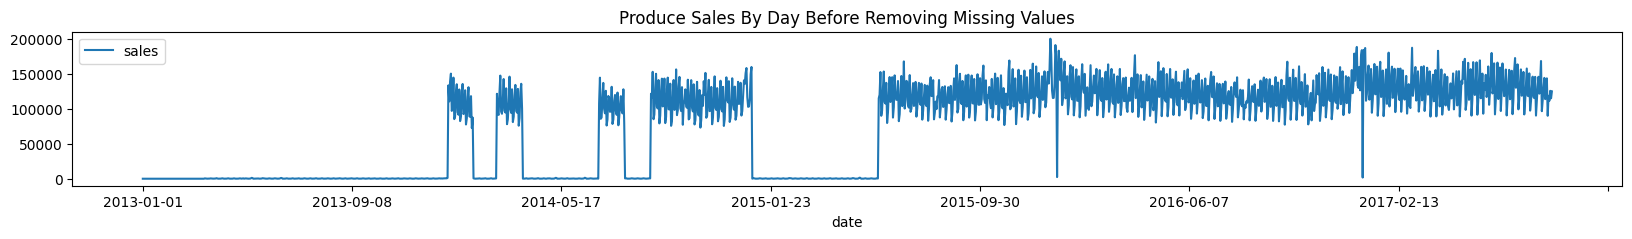

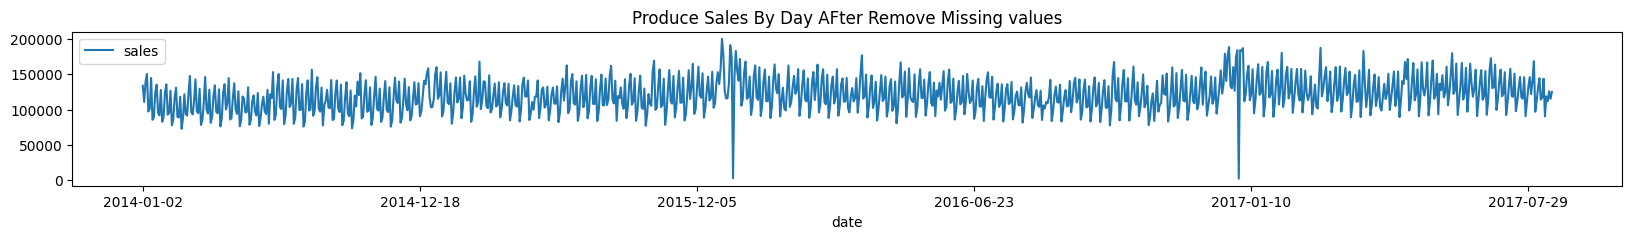

In [4]:
df.loc[(df["family"] == "PRODUCE")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "Produce Sales By Day Before Removing Missing Values")
produce = df.loc[(df["family"] == "PRODUCE")]
produce = produce.loc[(pd.to_datetime(produce["date"]).dt.year < 2016)]
produce_missing = produce.groupby('date')['sales'].sum().reset_index()
produce_missing_dates = list(produce_missing.loc[produce_missing['sales'] < 2000]["date"])
produce_missing_idx = produce.loc[produce["date"].isin(produce_missing_dates)].index
print("Shape before removing missing values: ", df.shape)
df = df.drop(produce_missing_idx)
print("Shape after removing missing values: ", df.shape)
df.loc[(df["family"] == "PRODUCE")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "Produce Sales By Day AFter Remove Missing values" )
plt.show()

#### Celebration

Shape before removing missing values:  (2964924, 13)
Shape after removing missing values:  (2917512, 13)


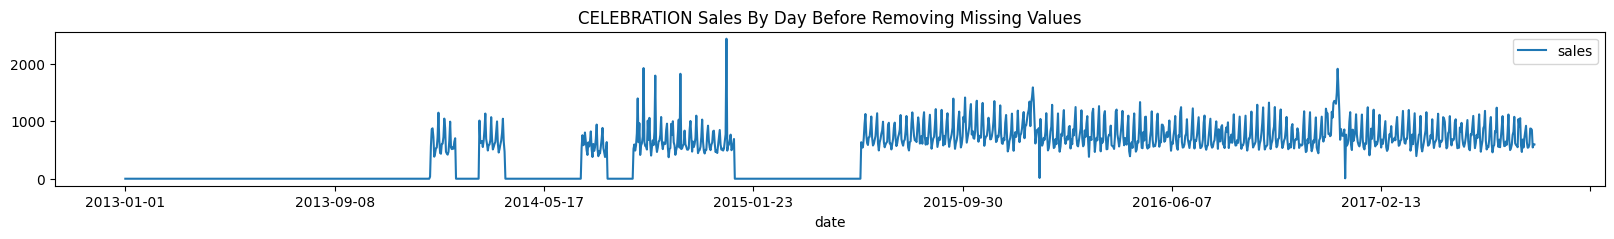

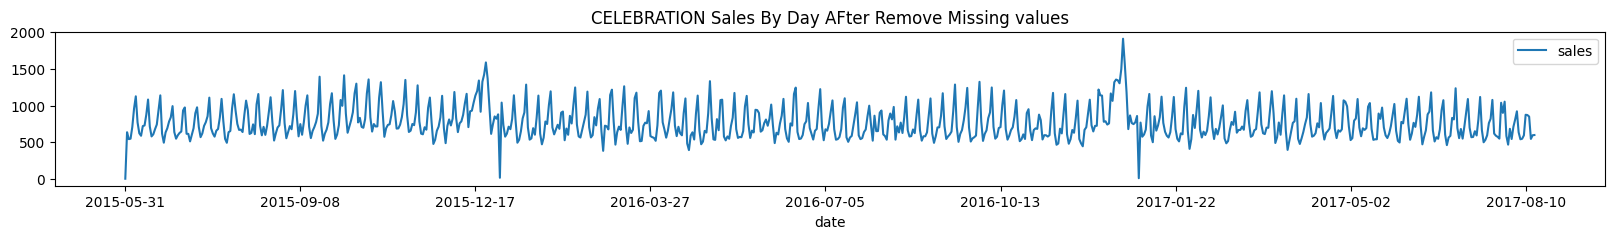

In [5]:
df.loc[(df["family"] == "CELEBRATION")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "CELEBRATION Sales By Day Before Removing Missing Values")
celebration = df.loc[(df["family"] == "CELEBRATION")]
celebration = celebration.loc[(pd.to_datetime(celebration["date"]).dt.year < 2016)]
celebration_missing = celebration.groupby('date')['sales'].sum().reset_index()
celebration_missing_dates = max(celebration_missing.loc[celebration_missing['sales'] == 0]["date"])
celebration_missing_idx = celebration.loc[celebration["date"] < '2015-05-31'].index
print("Shape before removing missing values: ", df.shape)
df = df.drop(celebration_missing_idx)
print("Shape after removing missing values: ", df.shape)
df.loc[(df["family"] == "CELEBRATION")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "CELEBRATION Sales By Day AFter Remove Missing values" )
plt.show()

#### Baby Care

Shape before removing missing values:  (2917512, 13)
Shape after removing missing values:  (2860164, 13)


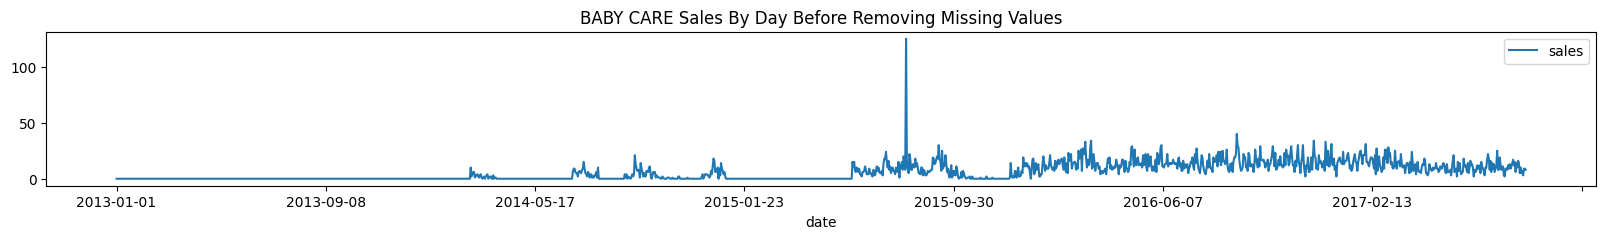

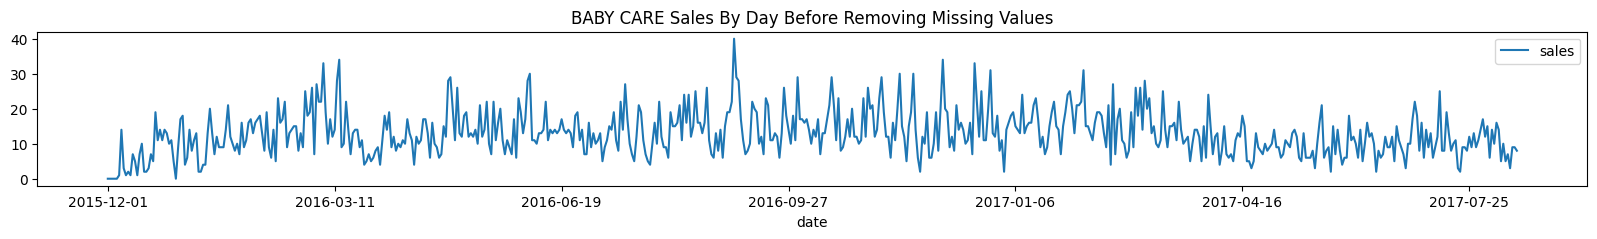

In [7]:
df.loc[(df["family"] == "BABY CARE")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "BABY CARE Sales By Day Before Removing Missing Values")
baby_care_missing_idx = df.loc[(df["family"] == "BABY CARE") & (df["date"] < '2015-12-01')].index
print("Shape before removing missing values: ", df.shape)
df = df.drop(baby_care_missing_idx)
print("Shape after removing missing values: ", df.shape)
df.loc[(df["family"] == "BABY CARE")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "BABY CARE Sales By Day Before Removing Missing Values")
plt.show()

#### Pet Supplies

Shape before removing missing values:  (2860164, 13)
Shape after removing missing values:  (2824632, 13)


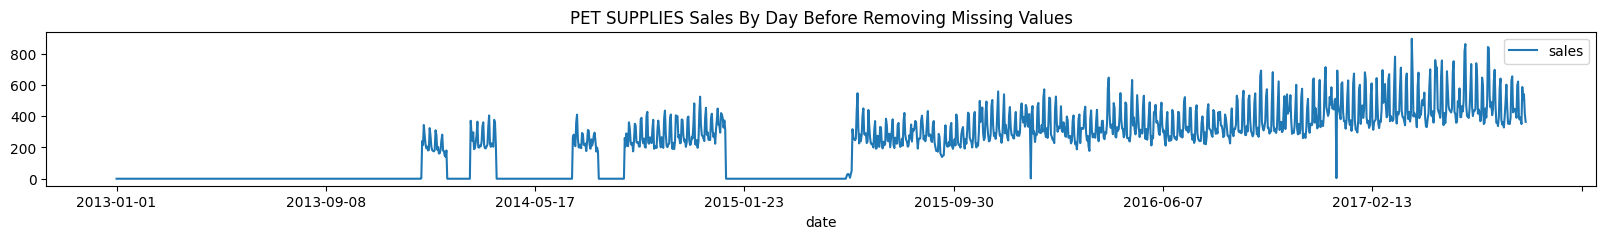

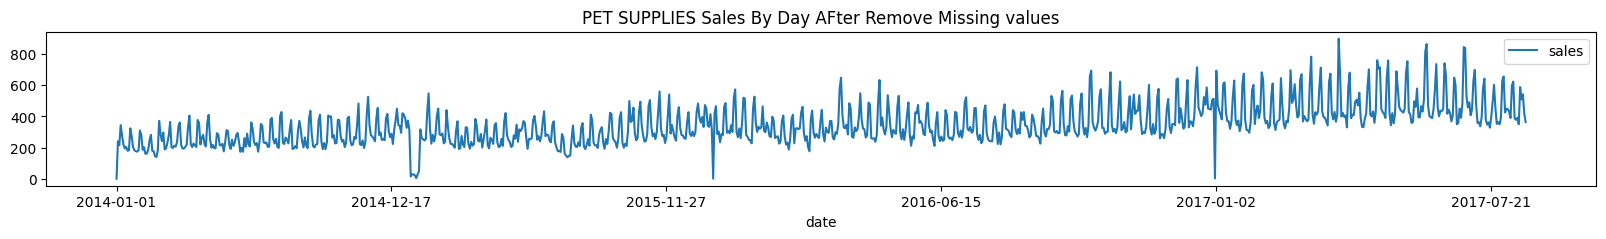

In [8]:
df.loc[(df["family"] == "PET SUPPLIES")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "PET SUPPLIES Sales By Day Before Removing Missing Values")
pet_supplies = df.loc[(df["family"] == "PET SUPPLIES")]
pet_supplies_missing = pet_supplies.loc[(pd.to_datetime(pet_supplies["date"]).dt.year <= 2015)]
pet_supplies_missing = pet_supplies_missing.groupby('date')['sales'].sum().reset_index()

pet_supplies_missing_dates = list(pet_supplies_missing.loc[pet_supplies_missing['sales'] == 0]["date"])
pet_supplies_missing_idx = pet_supplies.loc[pet_supplies["date"].isin(pet_supplies_missing_dates)].index
pet_supplies = pet_supplies.drop(pet_supplies_missing_idx)
pet_supplies.groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "PET SUPPLIES Sales By Day AFter Remove Missing values")

print("Shape before removing missing values: ", df.shape)
df = df.drop(pet_supplies_missing_idx)
print("Shape after removing missing values: ", df.shape)
plt.show()

#### HOME CARE

Shape before removing missing values:  (2824632, 13)
Shape after removing missing values:  (2790234, 13)


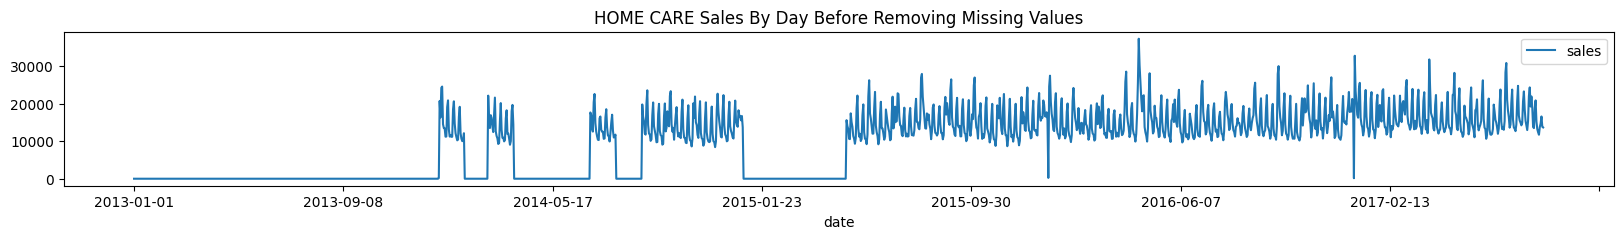

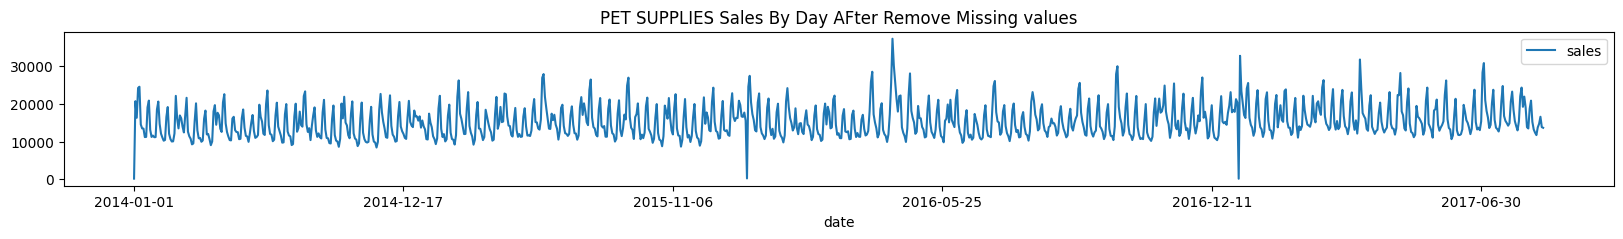

In [9]:
df.loc[(df["family"] == "HOME CARE")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "HOME CARE Sales By Day Before Removing Missing Values")
home_care = df.loc[(df["family"] == "HOME CARE")]
home_care_missing = home_care.loc[(pd.to_datetime(home_care["date"]).dt.year <= 2015)]
home_care_missing = home_care_missing.groupby('date')['sales'].sum().reset_index()
home_care_missing_dates = list(home_care_missing.loc[home_care_missing['sales'] == 0]["date"])
home_care_missing_idx = home_care.loc[home_care["date"].isin(home_care_missing_dates)].index
home_care = home_care.drop(home_care_missing_idx)
home_care.groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "PET SUPPLIES Sales By Day AFter Remove Missing values")
print("Shape before removing missing values: ", df.shape)
df = df.drop(home_care_missing_idx)
print("Shape after removing missing values: ", df.shape)
plt.show()

#### Ladies Wear

Shape before removing missing values:  (2790234, 13)
Shape after removing missing values:  (2754270, 13)


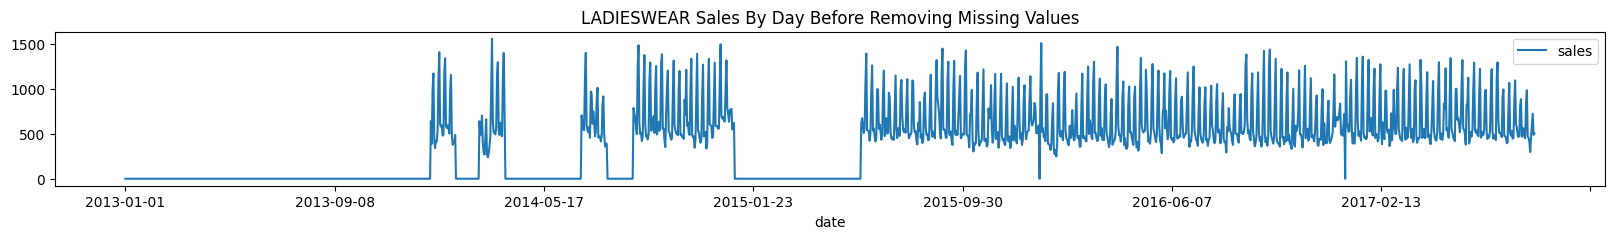

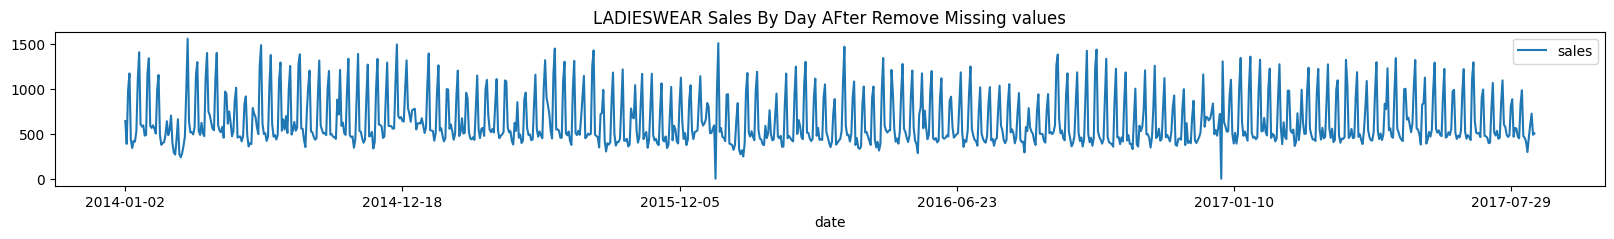

In [10]:
df.loc[(df["family"] == "LADIESWEAR")].groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "LADIESWEAR Sales By Day Before Removing Missing Values")
ladies_wear = df.loc[(df["family"] == "LADIESWEAR")]
ladies_wear_missing = ladies_wear.loc[(pd.to_datetime(ladies_wear["date"]).dt.year <= 2015)]
ladies_wear_missing = ladies_wear_missing.groupby('date')['sales'].sum().reset_index()
ladies_wear_missing_dates = list(ladies_wear_missing.loc[ladies_wear_missing['sales'] == 0]["date"])
ladies_wear_missing_idx = ladies_wear.loc[ladies_wear["date"].isin(ladies_wear_missing_dates)].index
ladies_wear = ladies_wear.drop(ladies_wear_missing_idx)
ladies_wear.groupby(["date"]).sum()[["sales"]].plot(figsize = (20,2), title = "LADIESWEAR Sales By Day AFter Remove Missing values")
print("Shape before removing missing values: ", df.shape)
df = df.drop(ladies_wear_missing_idx)
print("Shape after removing missing values: ", df.shape)
plt.show()

#### MAGAZINES

Shape before removing missing values:  (2754270, 13)
Shape after removing missing values:  (2700162, 13)


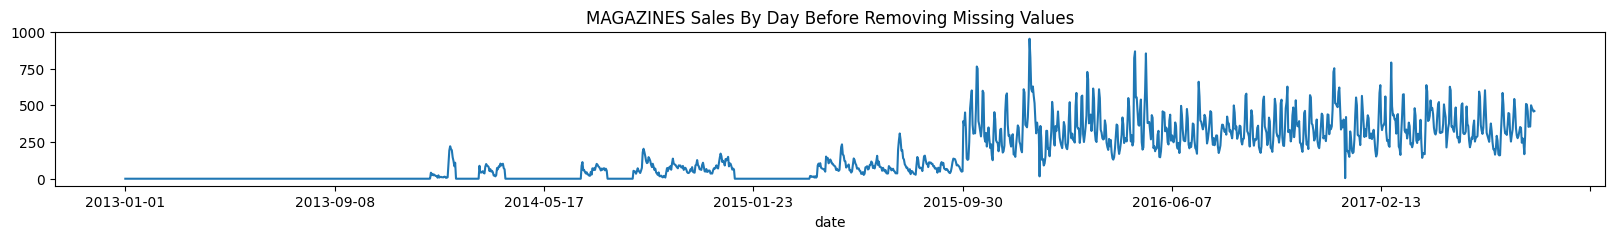

In [11]:
df.loc[(df["family"] == "MAGAZINES")].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "MAGAZINES Sales By Day Before Removing Missing Values")
magazines_idx = df.loc[(df["family"] == "MAGAZINES") & (df["date"] <= '2015-10-01')].index
print("Shape before removing missing values: ", df.shape)
df = df.drop(magazines_idx)
print("Shape after removing missing values: ", df.shape)
plt.show()

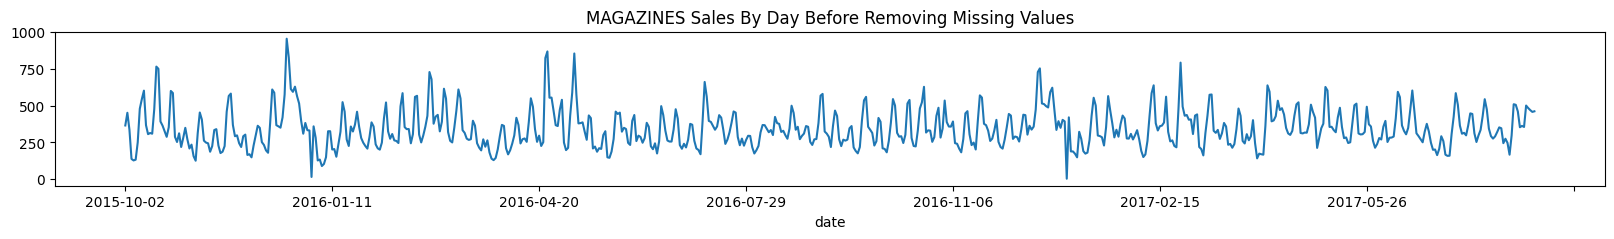

In [12]:
df.loc[(df["family"] == "MAGAZINES")].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "MAGAZINES Sales By Day Before Removing Missing Values")
plt.show()

#### MEATS

Shape before removing missing values:  (2700162, 13)
Shape after removing missing values:  (2700161, 13)


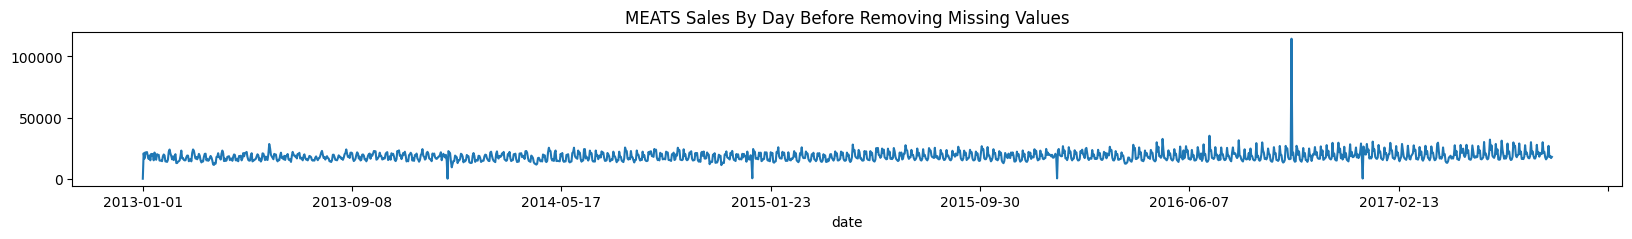

In [13]:
df.loc[(df["family"] == "MEATS")].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "MEATS Sales By Day Before Removing Missing Values")
meats = df.loc[(df["family"] == "MEATS")]
meats_outlier = meats.loc[meats['sales'] == max(meats['sales'])].index
print("Shape before removing missing values: ", df.shape)
df = df.drop(meats_outlier)
print("Shape after removing missing values: ", df.shape)

<Axes: title={'center': 'MEATS Sales By Day After Removing Missing Values'}, xlabel='date'>

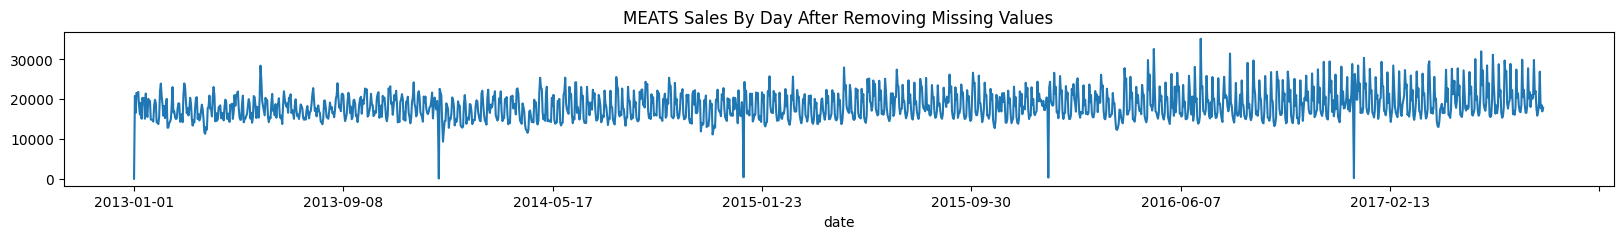

In [14]:
df.loc[(df["family"] == "MEATS")].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "MEATS Sales By Day After Removing Missing Values")


#### HOME AND KITCHEN

Shape before removing missing values:  (2700161, 13)
Shape after removing missing values:  (2644649, 13)


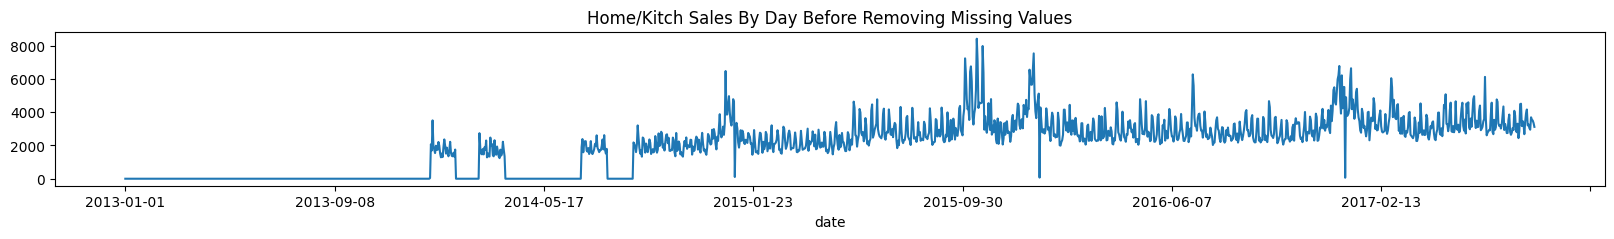

In [15]:
df.loc[df["family"].isin(["HOME AND KITCHEN I","HOME AND KITCHEN II"])].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "Home/Kitch Sales By Day Before Removing Missing Values")
home_kitch = df.loc[df["family"].isin(["HOME AND KITCHEN I","HOME AND KITCHEN II"])]
home_kitch = home_kitch.loc[home_kitch['date'] < '2015-01-01']
home_kitch_missing = home_kitch.groupby('date')['sales'].sum().reset_index()
home_kitch_missing_dates = list(home_kitch_missing.loc[home_kitch_missing['sales'] == 0]["date"])
home_kitch_missing_idx = home_kitch.loc[home_kitch['date'].isin(home_kitch_missing_dates)].index
print("Shape before removing missing values: ", df.shape)
df = df.drop(home_kitch_missing_idx)
print("Shape after removing missing values: ", df.shape)
plt.show()

<Axes: title={'center': 'Home/Kitchen Sales By Day Before Removing Missing Values'}, xlabel='date'>

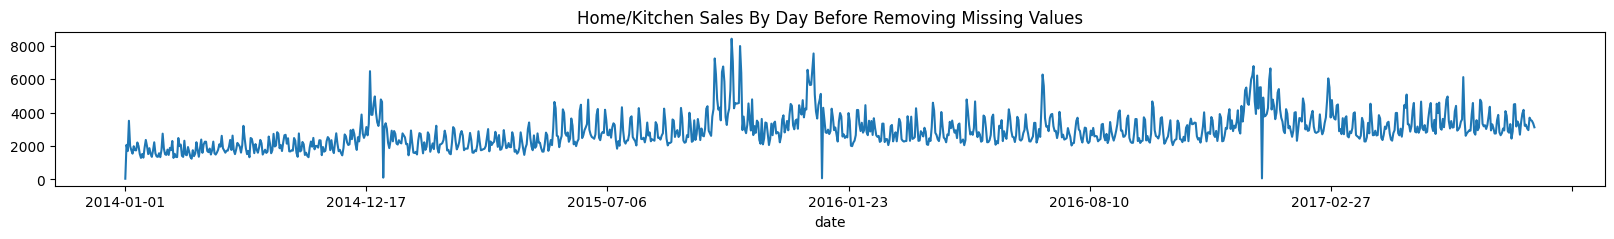

In [16]:
df.loc[df["family"].isin(["HOME AND KITCHEN I","HOME AND KITCHEN II"])].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "Home/Kitchen Sales By Day Before Removing Missing Values")

<Axes: title={'center': 'Sales By Day Before Removing Missing Values'}, xlabel='date'>

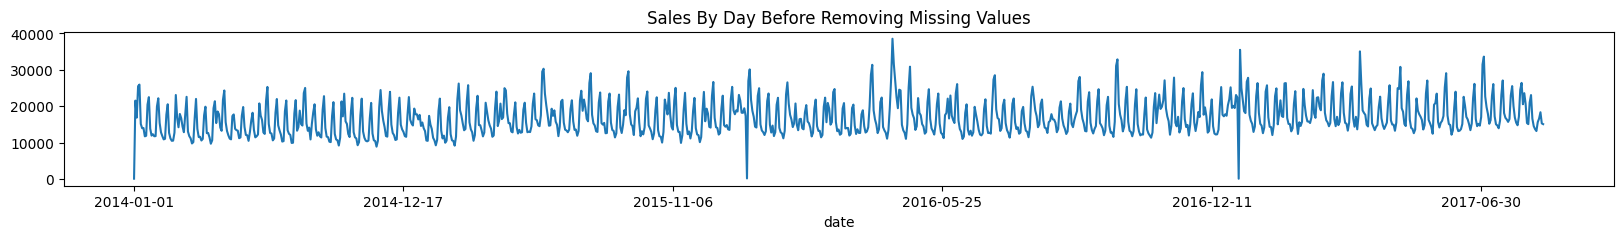

In [17]:
# List of families
fams = ['LADIESWEAR', 'HOME CARE', 'PET SUPPLIES', 'BABY CARE', 'CELEBRATION']
df.loc[df["family"].isin(fams)].groupby(["date"]).sum()["sales"].plot(figsize = (20,2), title = "Sales By Day Before Removing Missing Values")

### Difference after removing missing values in aggregate

In [18]:
print("rows removed from the data set", train.shape[0] - df.shape[0])

rows removed from the data set 356239


In [19]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,month_cat,day_cat,new_years_day
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Quito,Pichincha,D,13,January,Tuesday,True


In [36]:
weekday_order = {'Monday': 0, 'Tuesday': 1, 'Wednesday': 2, 'Thursday': 3, 'Friday': 4, 'Saturday': 5, 'Sunday': 6}
day_of_week = df.groupby(['day_cat', 'family'])['sales'].sum().reset_index()
day_of_week = day_of_week.sort_values(by='day_cat', key=lambda x: x.map(weekday_order)).set_index('day_cat')

C:\kaggle_competitions\store_sales\.venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


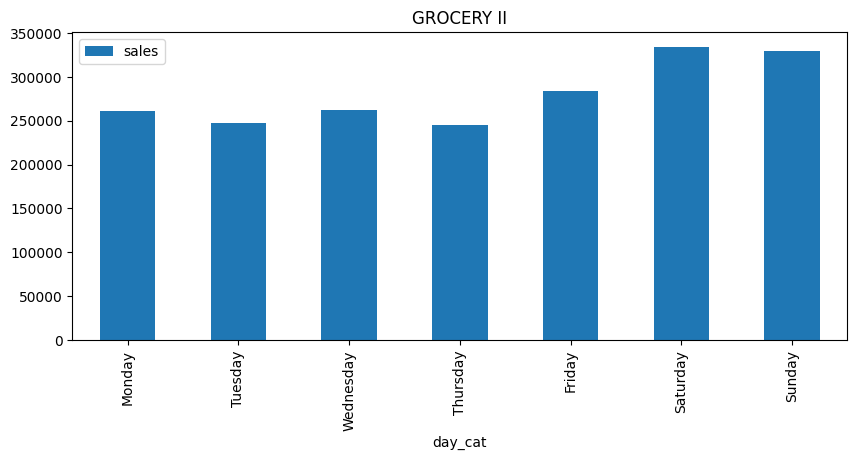

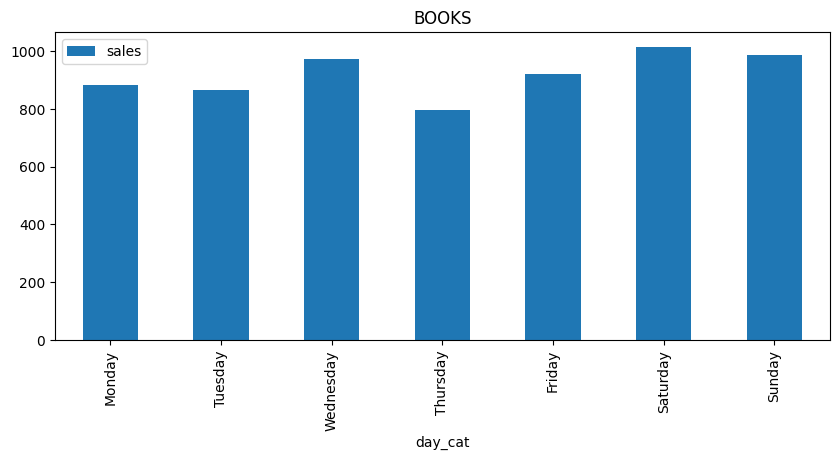

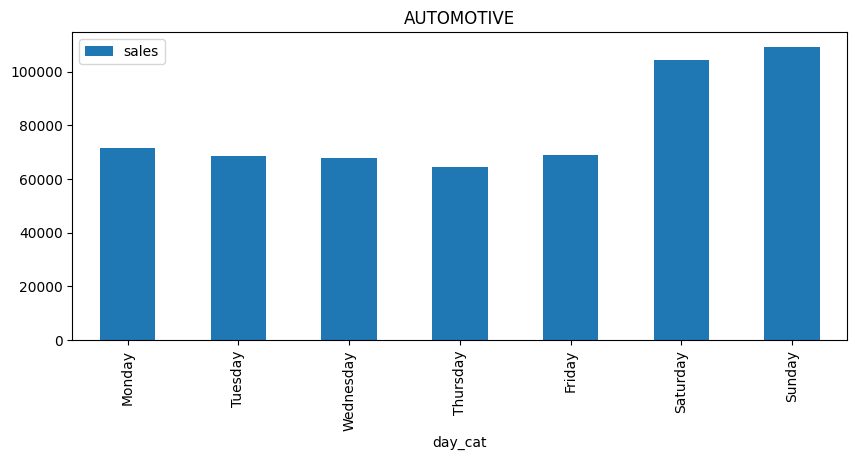

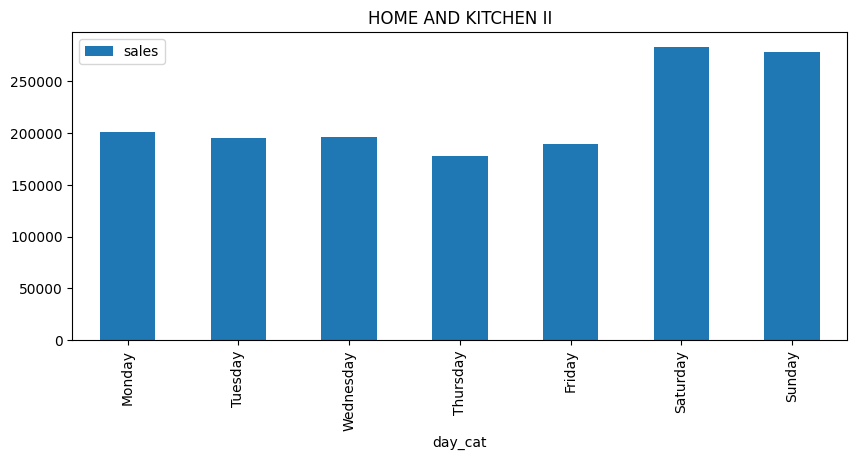

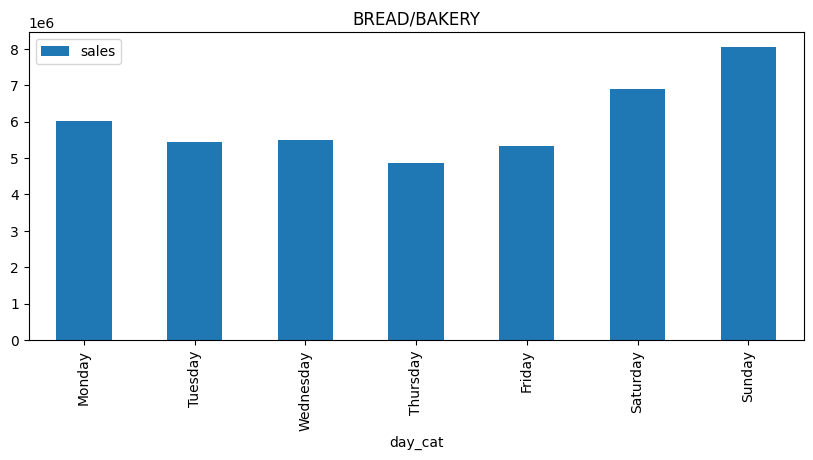

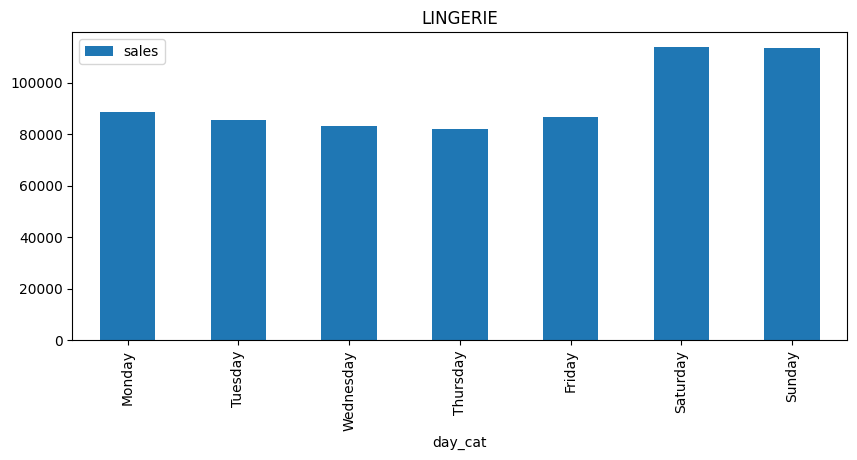

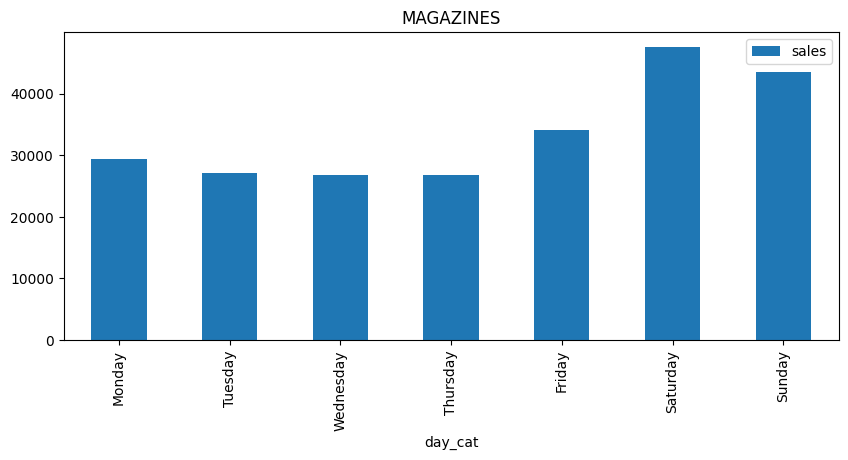

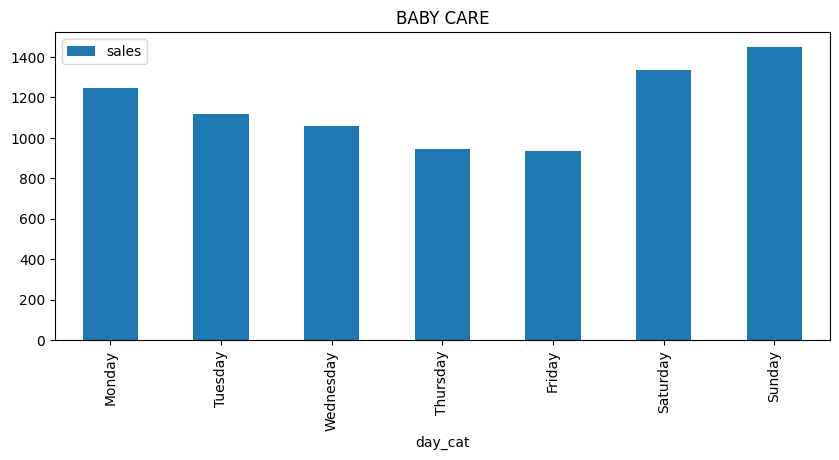

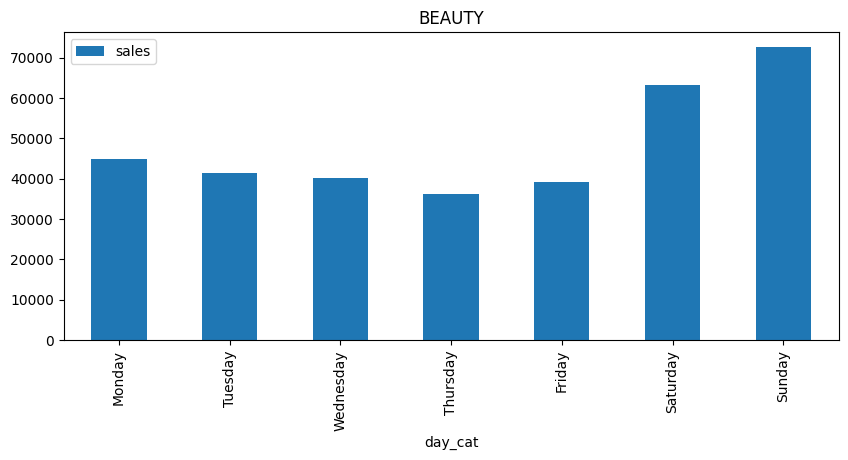

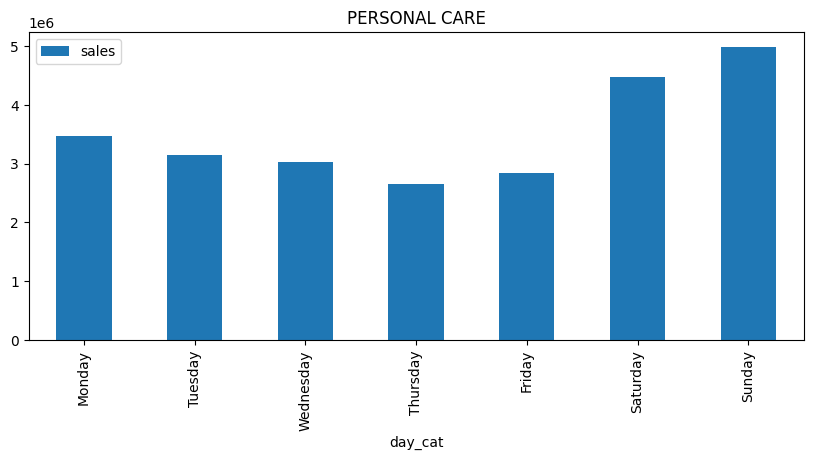

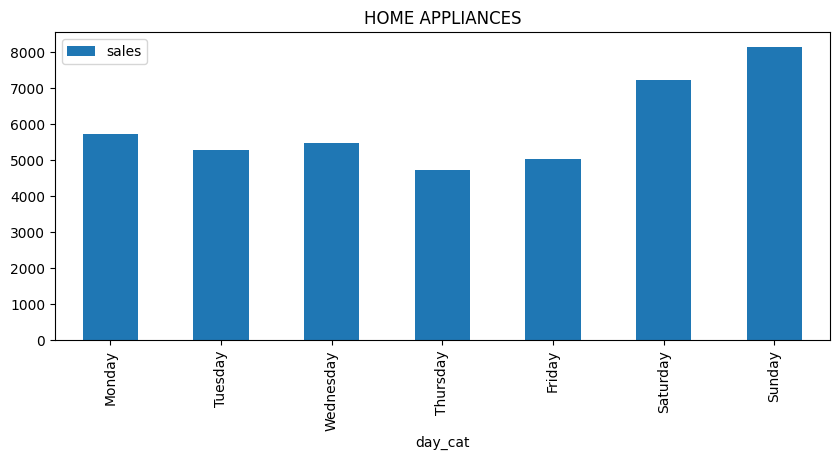

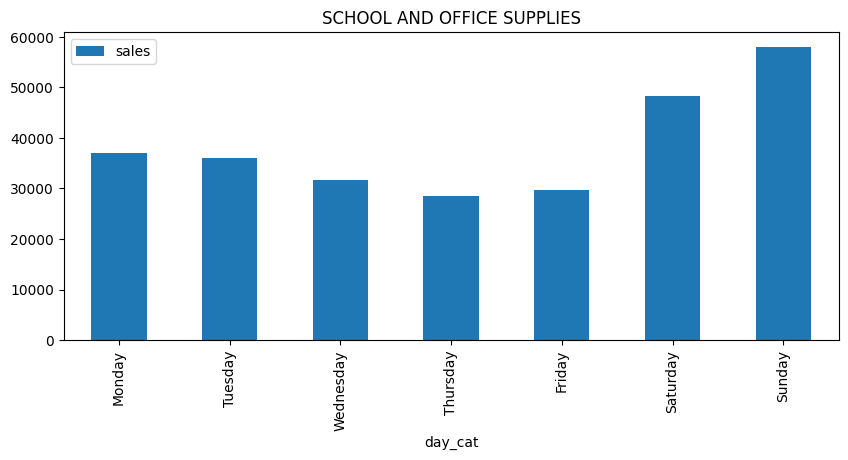

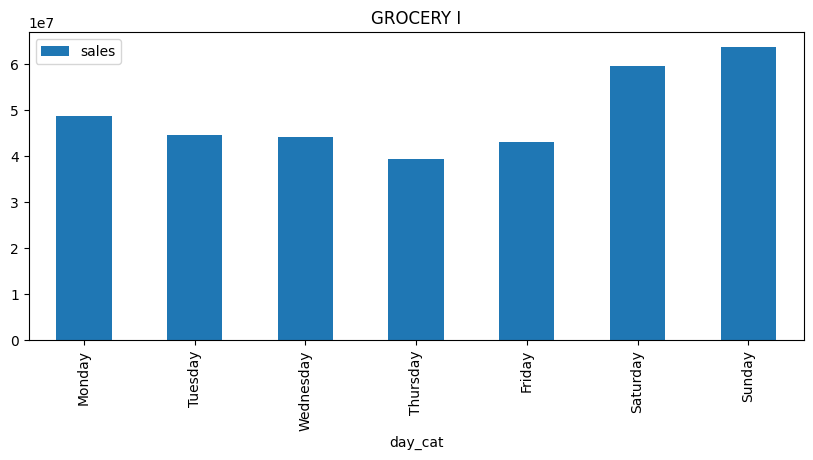

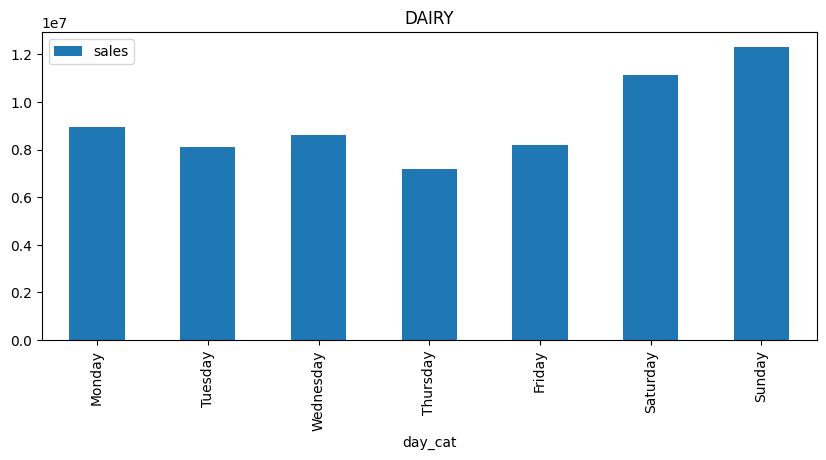

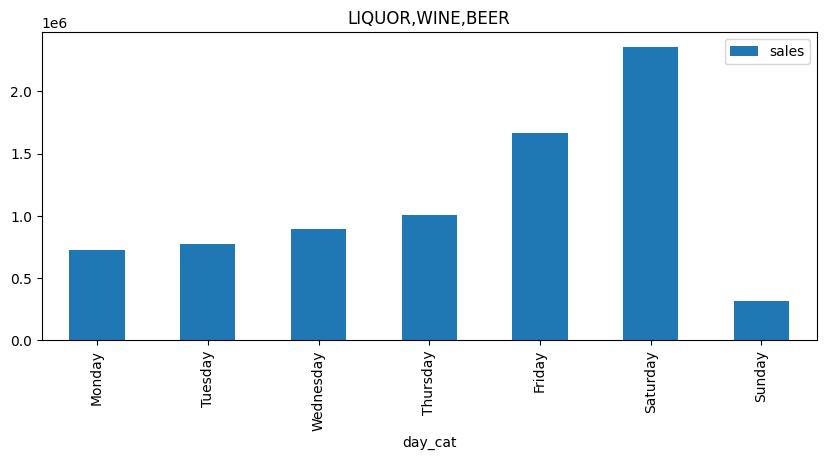

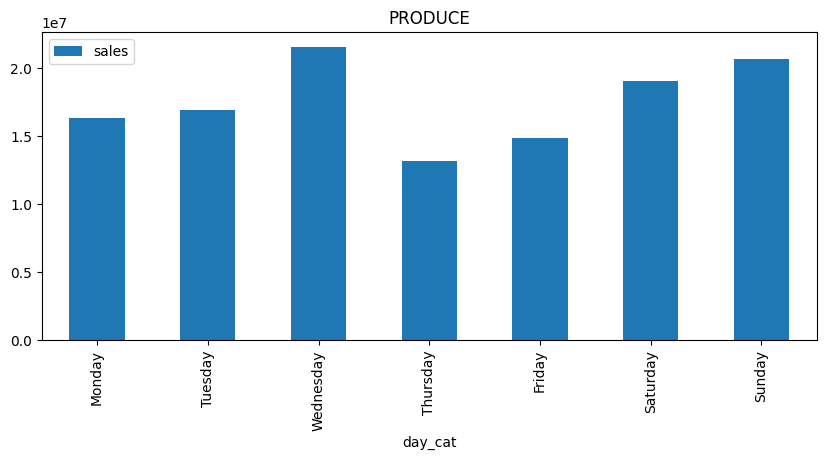

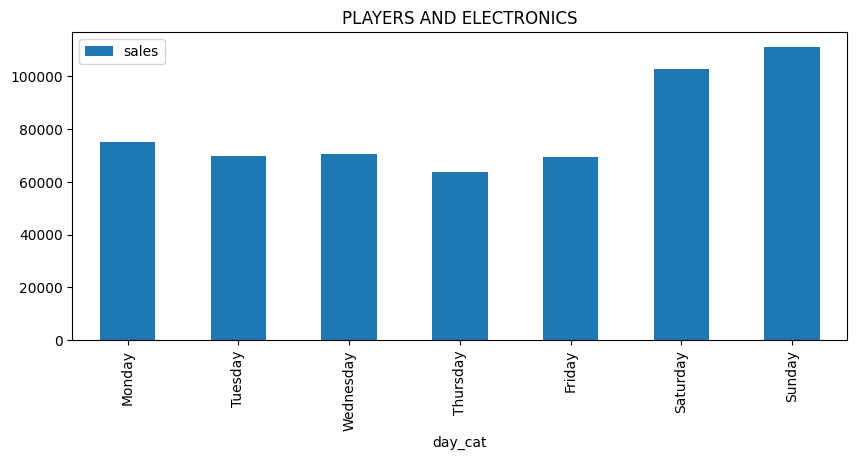

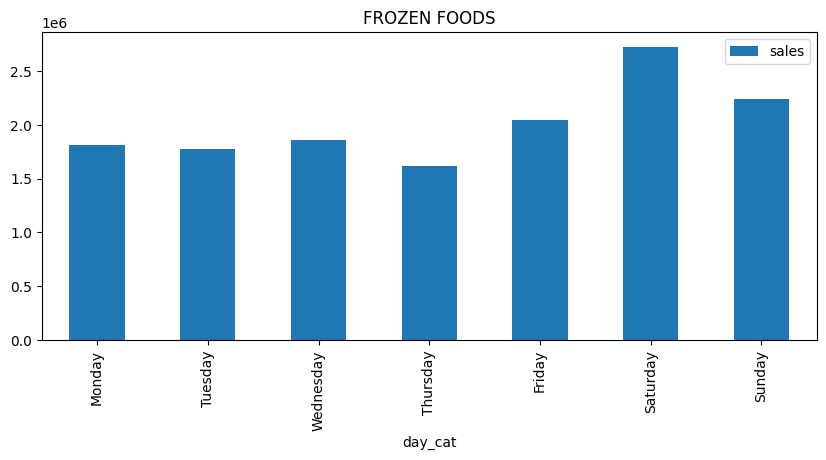

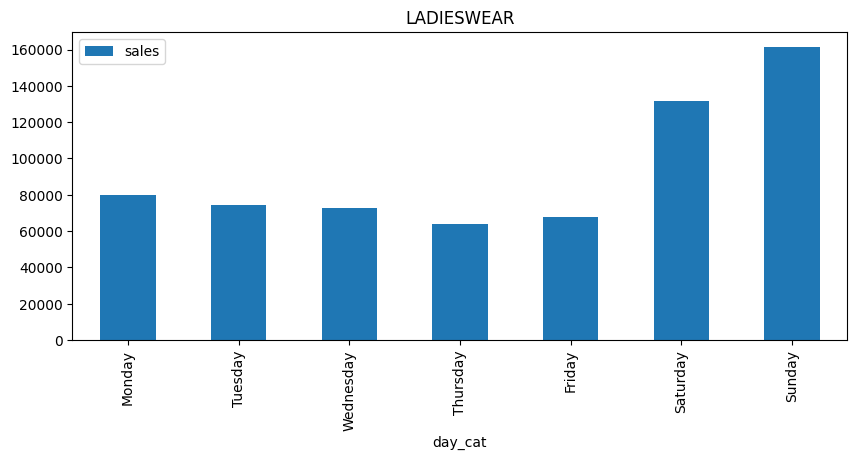

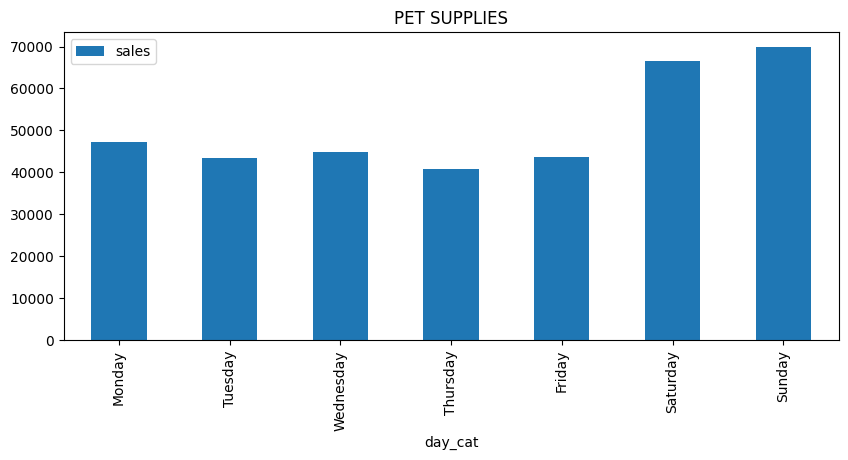

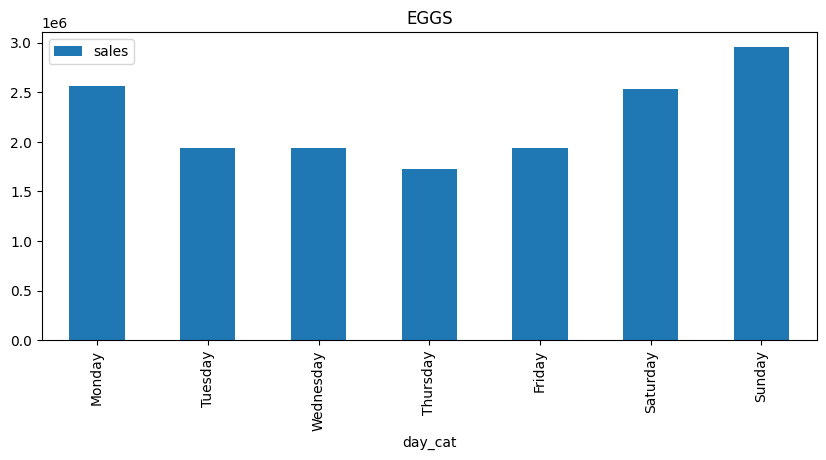

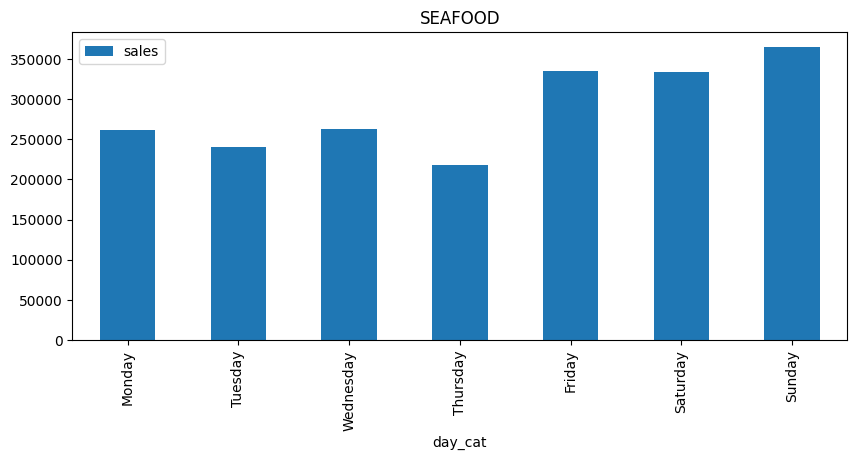

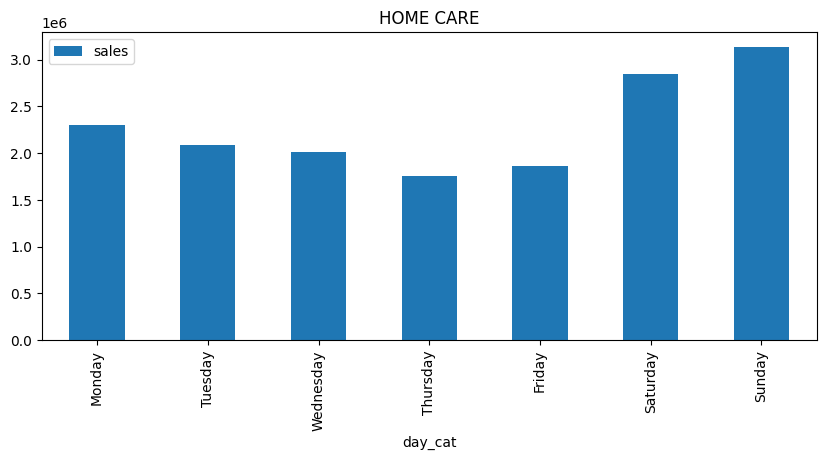

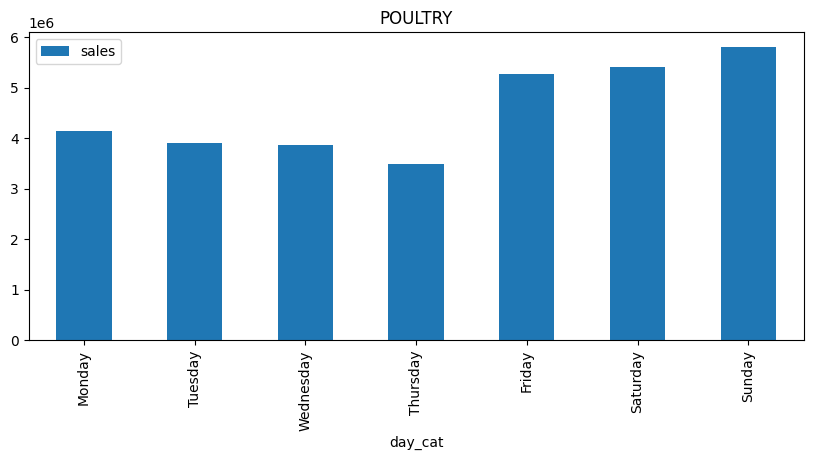

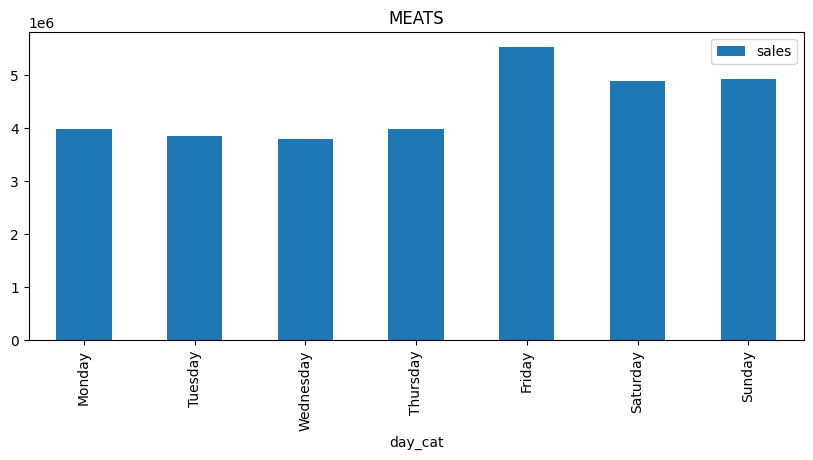

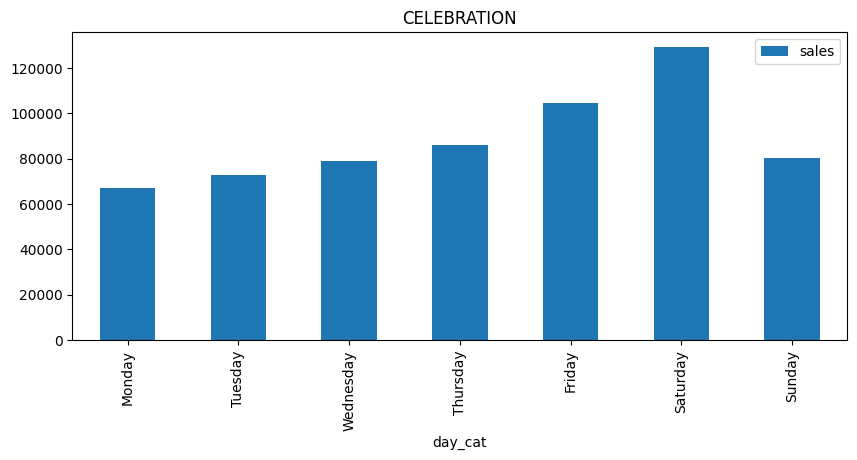

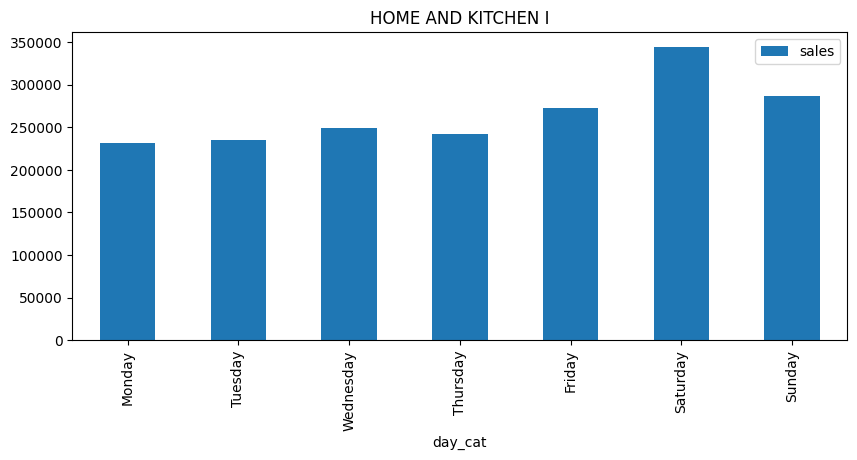

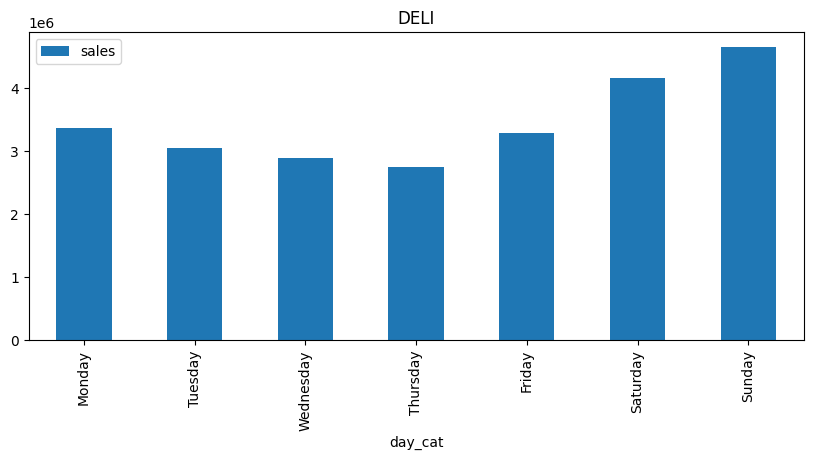

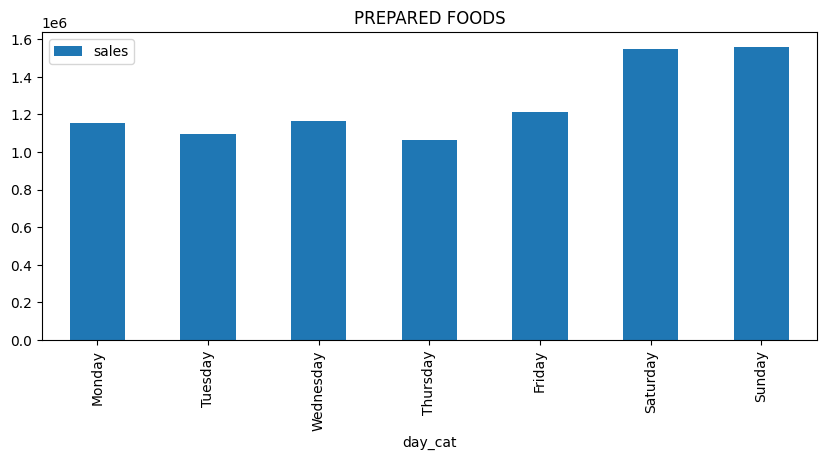

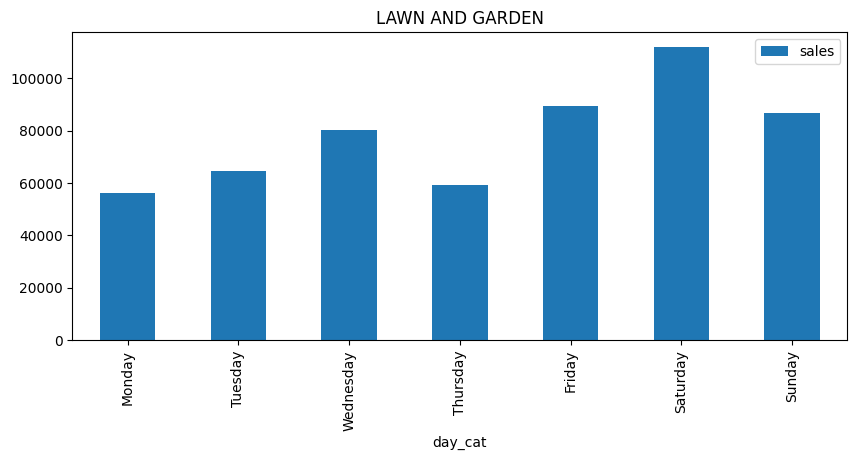

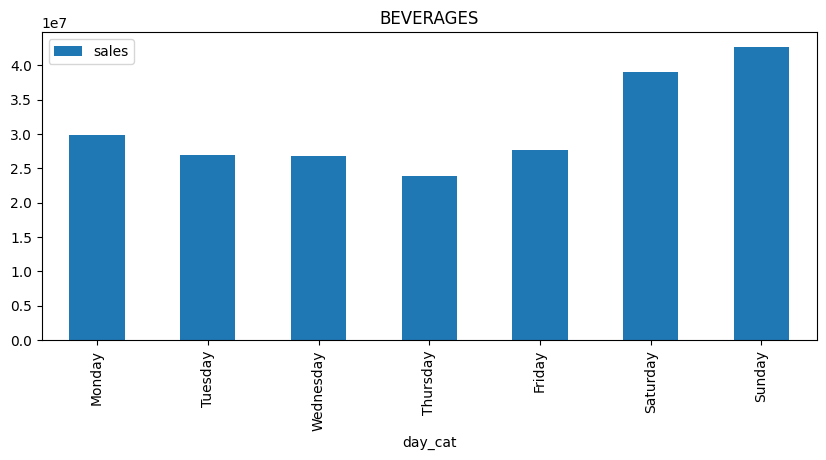

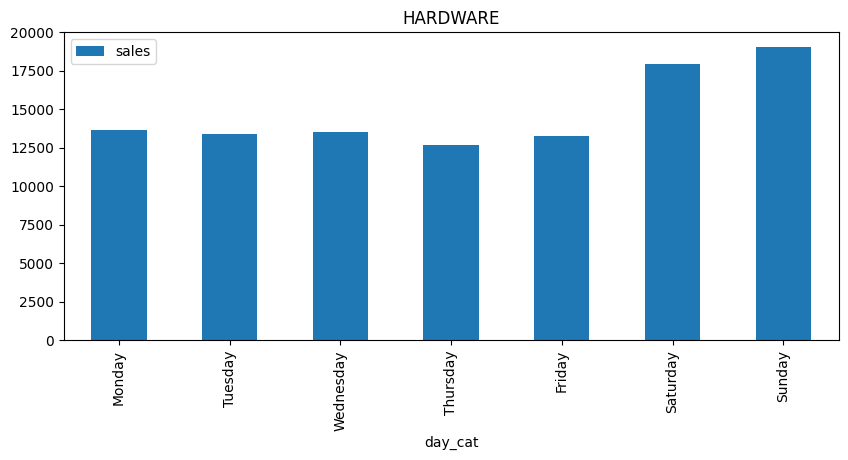

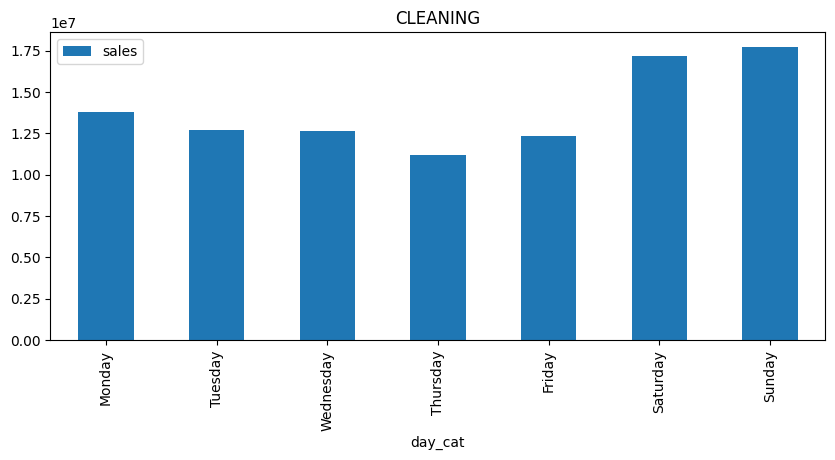

In [37]:
fams = list(set(day_of_week['family']))
for i in fams:
    day_of_week.loc[day_of_week['family'] == i].plot(kind = 'bar', title = i, figsize = (10,4))

In [38]:
df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,month_cat,day_cat,new_years_day
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,January,Tuesday,True
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,January,Tuesday,True
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,January,Tuesday,True
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,January,Tuesday,True
5,5,2013-01-01,1,BREAD/BAKERY,0.000,0,Quito,Pichincha,D,13,January,Tuesday,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,August,Tuesday,False
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,August,Tuesday,False
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,August,Tuesday,False
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,August,Tuesday,False


### Model Time!

In [ ]:
df = df.loc[(df["family"] == "MAGAZINES")]
df

In [ ]:
# df[["store_nbr","city", "state", "family"]].value_counts()

In [ ]:
df = df.merge(transactions, on = ["date","store_nbr"])
df["store_nbr"] = df["store_nbr"].astype("category")

In [ ]:
df["date"] = df["date"].astype('object') 
df["date_num"] = pd.to_datetime(df["date"]).map(dt.datetime.toordinal)
df["date_num_lag"] = df['date_num'].shift(1)

In [ ]:
X = df[["new_years_day", "store_nbr", "day_cat", "transactions"]]
X = pd.get_dummies(X)

y = df.loc[:,"sales"]

# Create a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=2, test_size = 9000)

# Iterate over the splits
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

display(X_train.head())
display(X_train.shape)
display(X_test.shape)

In [ ]:
# Train the model
model = LinearRegression()
# (X[1:], y[1:]) 
model.fit(X_train, y_train)
# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_
# model.
print("Coefficients:", coefficients)
print("Intercept:", intercept)
# s
# X_test = data_pipline(test,["family", "city"])
y_pred = pd.Series(model.predict(X_test))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [ ]:
# Plot the regression line (for simple linear regression)
plt.scatter(y_test.reset_index(drop = True), y_pred, color='blue')
# plt.plot(X_test, y_pred, color='red')
plt.show()

In [ ]:
df_plot = df.iloc[test_index].reset_index(drop = True)
df_plot["y_pred"] = y_pred 
df_plot.groupby("date")[["sales", "y_pred"]].sum().plot(figsize = (20,6))